 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [16]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [21]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_daily_returns = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [25]:
# Count nulls
whale_daily_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [37]:
# Drop nulls
whale_daily_returns.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [146]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_daily_returns = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_daily_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [147]:
# Count nulls
algo_daily_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [148]:
# Drop nulls
algo_daily_returns.dropna()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [149]:
# Reading S&P 500 Closing Prices
sp500_returns_csv = Path("Resources/sp500_history.csv")
sp500_returns_df = pd.read_csv(sp500_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_returns_df.sort_index(inplace=True)
sp500_returns_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [150]:
# Check Data Types
sp500_returns_df.dtypes

Close    object
dtype: object

In [151]:
# Fix Data Types
sp500_returns_df['Close'] = sp500_returns_df['Close'].replace(r'[$,]','',regex=True).astype('float64')
sp500_returns_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [55]:
# Calculate Daily Returns
sp500_daily_returns=sp500_returns_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [67]:
# Drop nulls
sp500_daily_returns.isnull().sum()
sp500_daily_returns.dropna(inplace=True)

In [68]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.columns=['SP 500']
sp500_daily_returns.head()

,SP 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [155]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_portfolio_return = pd.concat([whale_daily_returns, algo_daily_returns, sp500_daily_returns], axis='columns', join='inner')
all_portfolio_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

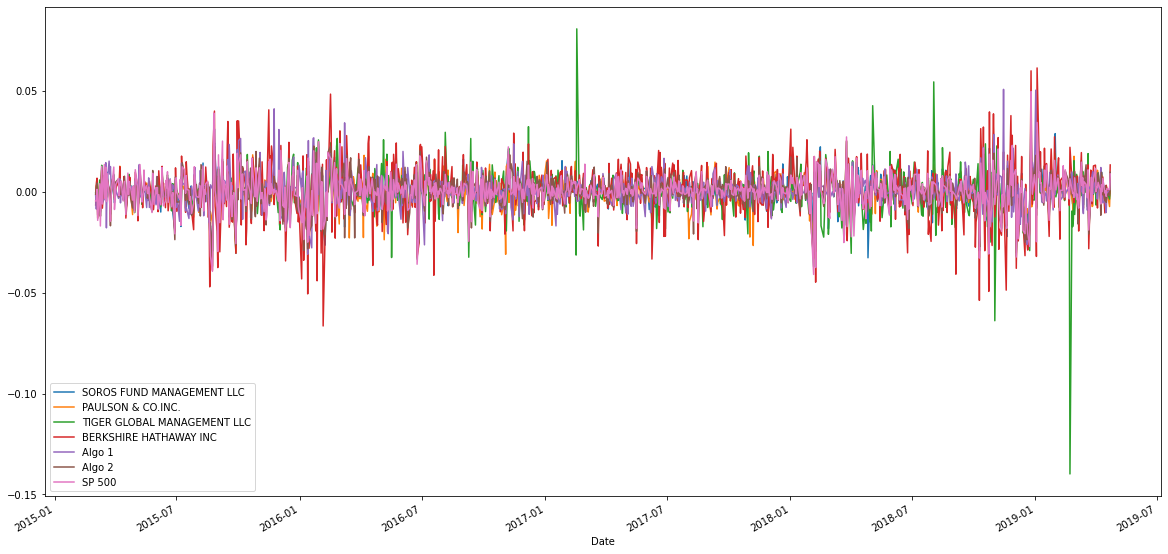

In [156]:
# Plot daily returns of all portfolios
all_portfolio_return.plot(figsize=(20,10))


#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

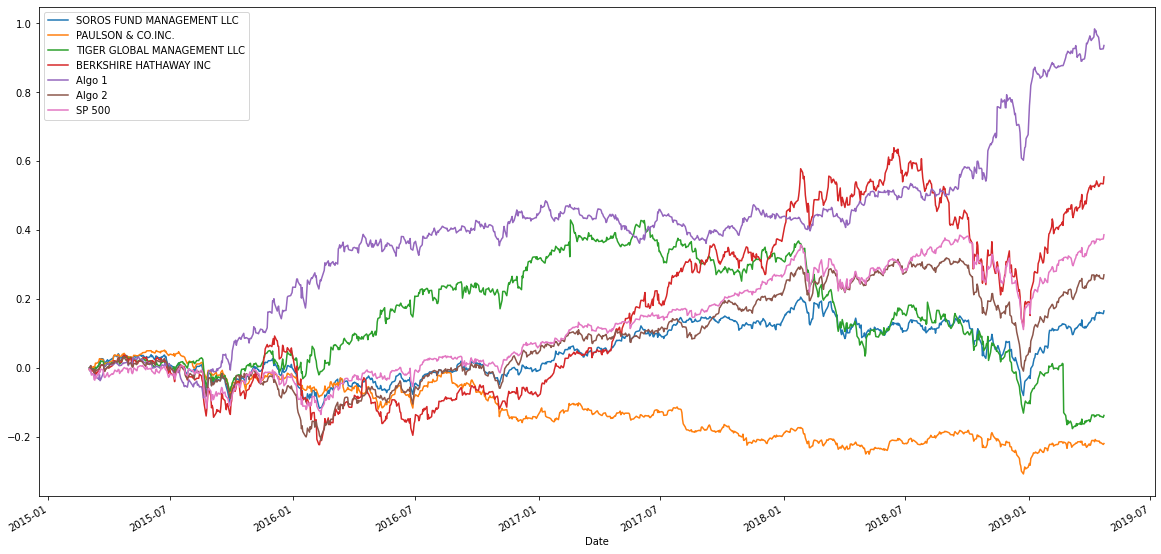

In [157]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_portfolio_return.sort_index()).cumprod()-1
cumulative_returns.plot(figsize=(20,10))

# Plot cumulative returns


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

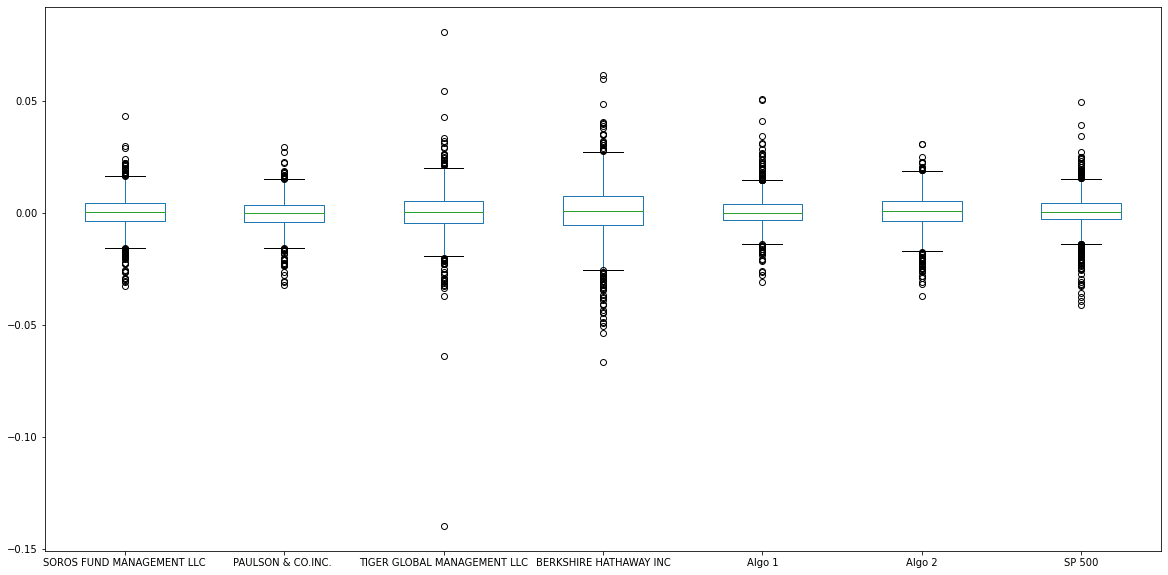

In [158]:
# Box plot to visually show risk
all_portfolio_return.plot.box(figsize=(20,10))


### Calculate Standard Deviations

In [159]:
# Calculate the daily standard deviations of all portfolios
all_portfolio_std = all_portfolio_return.std()
all_portfolio_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP 500                         0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [161]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_std = sp500_daily_returns.std()
sp500_daily_std
print(sp500_daily_std)




# Determine which portfolios are riskier than the S&P 500

all_portfolio_std[(all_portfolio_std['SP 500'] < all_portfolio_std)]


SP 500    0.008111
dtype: float64


TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Calculate the Annualized Standard Deviation

In [162]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std = all_portfolio_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP 500                         0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

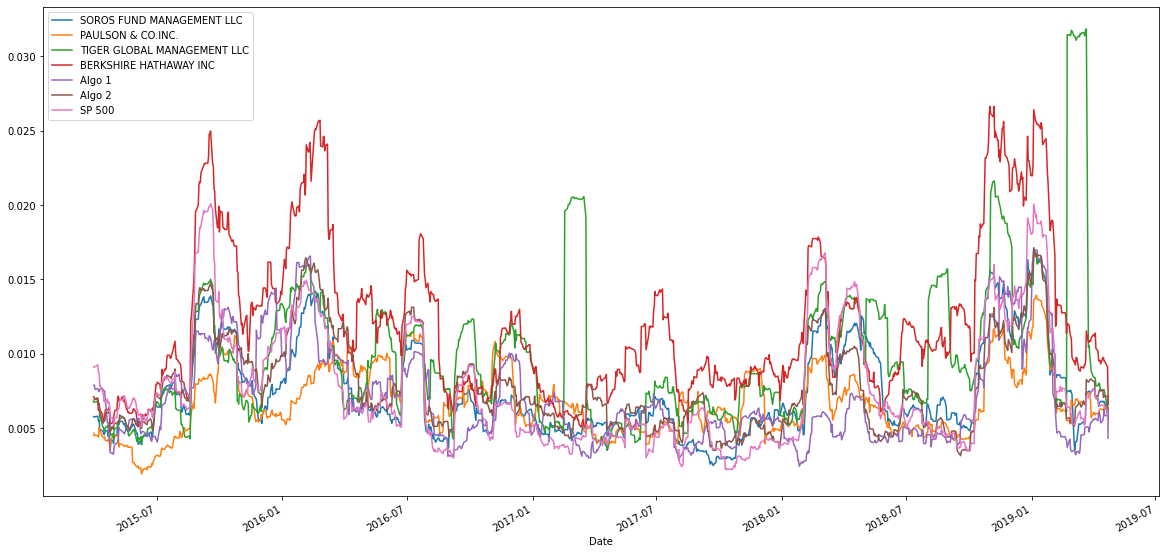

In [163]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_portfolio_return.rolling(window=21).std().plot(figsize=[20,10])


# Plot the rolling standard deviation


### Calculate and plot the correlation

In [164]:
# Calculate the correlation

# Display de correlation matrix
all_portfolio_return.corr()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of BH'}, xlabel='Date'>

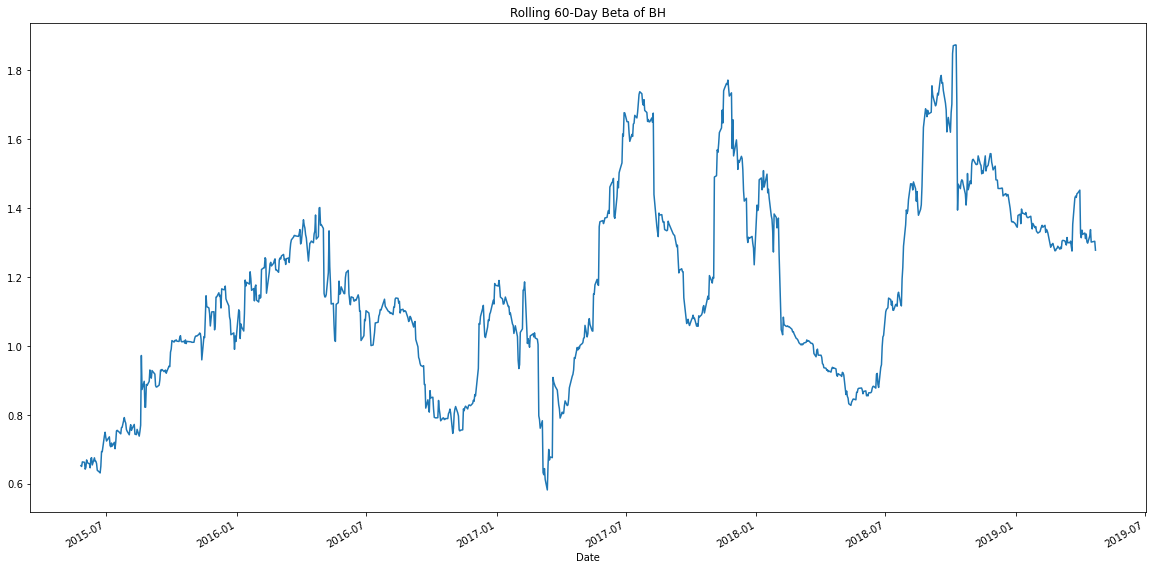

In [171]:
# Calculate covariance of a single portfolio
rolling_covariance = all_portfolio_return['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(all_portfolio_return['SP 500'])
rolling_variance = all_portfolio_return['SP 500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BH')







## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [172]:
# Use `ewm` to calculate the rolling window
all_portfolio_return.ewm(halflife=21).std().head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.000106
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.003294
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.006498
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.007083


# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [174]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_portfolio_return.mean() * 252) / (all_portfolio_return.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP 500                         0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

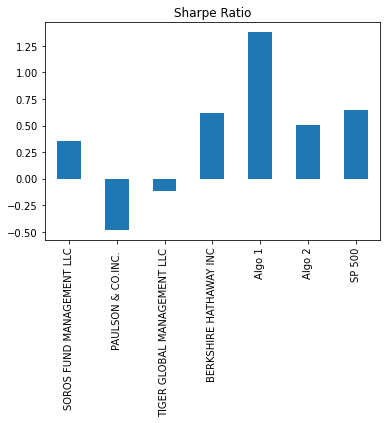

In [182]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratio')


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [176]:
# Reading data from 1st stock
appl_path = Path('Resources/aapl_historical.csv')
appl_df = pd.read_csv(appl_path, index_col='Trade DATE', infer_datetime_format=True,  parse_dates=True, usecols=['Trade DATE','NOCP'])
appl_df.head()

,NOCP
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [177]:
# Reading data from 2nd stock
# Read the second stock
cost_path = Path('Resources/cost_historical.csv')
cost_df = pd.read_csv(cost_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True, usecols=['Trade DATE','NOCP'])
cost_df.head()

,NOCP
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [178]:
# Reading data from 3rd stock
goog_path = Path('Resources/goog_historical.csv')
goog_df = pd.read_csv(goog_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True, usecols=['Trade DATE','NOCP'])
goog_df.head()

,NOCP
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [191]:
# Combine all stocks in a single DataFrame
my_portfolio = pd.concat([appl_df, cost_df, goog_df], axis='columns', join='inner')

# Reset Date index
my_portfolio_return = my_portfolio.sort_index().pct_change() 
my_portfolio_return.head()

,NOCP,NOCP,NOCP
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940


In [195]:
# Reorganize portfolio data by having a column per symbol
my_portfolio_return = my_portfolio.sort_index().pct_change()
my_portfolio.columns = ['APPL', 'COST', 'GOOG']
my_portfolio_return.head()

,APPL,COST,GOOG
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940


In [202]:
# Calculate daily returns
portfolio_daily_return = my_portfolio_return.pct_change()
# Drop NAs
portfolio_daily_return =daily_return.dropna()
# Display sample data
daily_return

portfolio_daily_return

,APPL,COST,GOOG
Trade DATE,,,
2018-05-15,2.895452,-4.331291,-11.790218
2018-05-16,-2.026877,-9.091523,-1.123479
2018-05-17,-1.677584,-0.728937,-2.249029
2018-05-18,-0.424935,-1.715895,2.857251
2018-05-21,-2.948261,-2.034567,-2.093346
...,...,...,...
2019-05-03,-2.910241,0.746593,-5.185964
2019-05-06,-2.242250,-1.200478,-0.828289
2019-05-07,0.745611,9.401198,-4.819225


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [209]:
# Set weights
weights = [.33, .33, .33]

port_returns = portfolio_daily_return.mul(weights, axis=1).sum(axis=1)
port_returns

# Calculate portfolio return



# Display sample data


Trade DATE
2018-05-15    -4.364599
2018-05-16    -4.039820
2018-05-17    -1.536332
2018-05-18     0.236419
2018-05-21    -2.335138
                ...    
2019-05-03    -2.425372
2019-05-06    -1.409436
2019-05-07     1.758103
2019-05-08    -0.917333
2019-05-09   -18.203372
Length: 248, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [240]:
# Join your returns DataFrame to the original returns DataFrame

all_portfolio_returns = pd.concat([port_returns, portfolio_daily_return], axis='columns', join='inner')
all_portfolio_returns

all_portfolio_returns.rename(columns={0:'My Portfolio'}, inplace=True)
all_portfolio_returns.head()

,My Portfolio,APPL,COST,GOOG
Trade DATE,,,,
2018-05-15,-4.364599,2.895452,-4.331291,-11.790218
2018-05-16,-4.039820,-2.026877,-9.091523,-1.123479
2018-05-17,-1.536332,-1.677584,-0.728937,-2.249029
2018-05-18,0.236419,-0.424935,-1.715895,2.857251
2018-05-21,-2.335138,-2.948261,-2.034567,-2.093346


In [241]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolio_returns.dropna()

,My Portfolio,APPL,COST,GOOG
Trade DATE,,,,
2018-05-15,-4.364599,2.895452,-4.331291,-11.790218
2018-05-16,-4.039820,-2.026877,-9.091523,-1.123479
2018-05-17,-1.536332,-1.677584,-0.728937,-2.249029
2018-05-18,0.236419,-0.424935,-1.715895,2.857251
2018-05-21,-2.335138,-2.948261,-2.034567,-2.093346
...,...,...,...,...
2019-05-03,-2.425372,-2.910241,0.746593,-5.185964
2019-05-06,-1.409436,-2.242250,-1.200478,-0.828289
2019-05-07,1.758103,0.745611,9.401198,-4.819225


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [242]:
# Calculate the annualized `std`
annualised_std =  all_portfolio_returns * np.sqrt(252)
annualised_std

,My Portfolio,APPL,COST,GOOG
Trade DATE,,,,
2018-05-15,-69.285860,45.963878,-68.757117,-187.163911
2018-05-16,-64.130155,-32.175669,-144.323460,-17.834675
2018-05-17,-24.388508,-26.630825,-11.571518,-35.702227
2018-05-18,3.753035,-6.745632,-27.238984,45.357451
2018-05-21,-37.069160,-46.802199,-32.297754,-33.230834
...,...,...,...,...
2019-05-03,-38.501591,-46.198651,11.851795,-82.324633
2019-05-06,-22.374096,-35.594608,-19.057001,-13.148683
2019-05-07,27.909019,11.836215,149.239393,-76.502823


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day Beta of BH'}, xlabel='Trade DATE'>

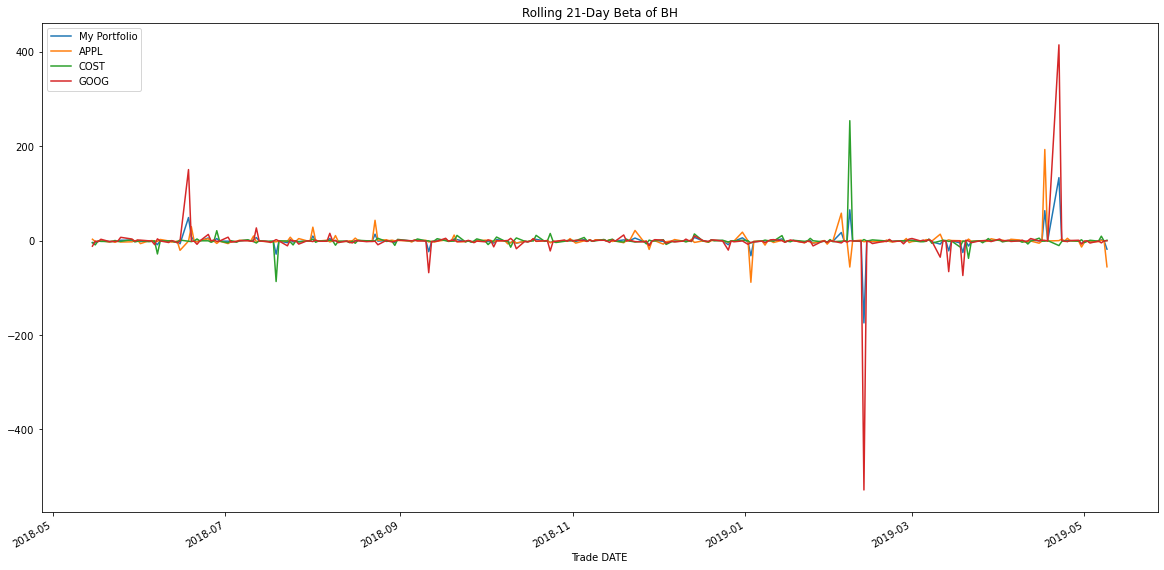

In [246]:
# Calculate rolling standard deviation

all_portfolio_returns.rolling(window=21).std()

# Plot rolling standard deviation
all_portfolio_returns.plot(figsize=(20, 10), title='Rolling 21-Day Beta of BH')

### Calculate and plot the correlation

In [277]:
# Calculate and plot the correlation

correlation =all_portfolio_returns.corr()
correlation

#from matplotlib import pyplot
#plot.scatter(correlation, sp500_returns_df )

#correlation.plot(kind='scatter', x='sp500_returns_df', y='correlation')

,My Portfolio,APPL,COST,GOOG
My Portfolio,1.000000,0.255326,0.264994,0.902058
APPL,0.255326,1.000000,-0.207244,0.008520
COST,0.264994,-0.207244,1.000000,-0.032593
GOOG,0.902058,0.008520,-0.032593,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'My Portfolio'}, xlabel='Date'>

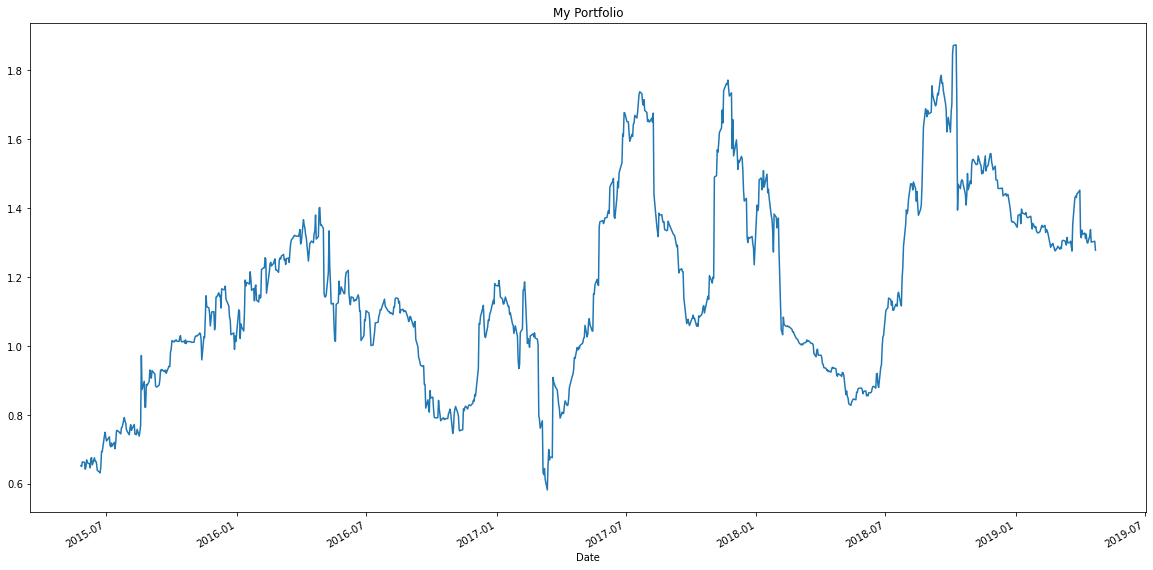

In [358]:
# Calculate and plot Beta



rolling_covariance1 = all_portfolio_returns['My Portfolio'].rolling(window=60).cov(sp500_daily_returns['SP 500'])
rolling_variance1 = sp500_daily_returns['SP 500'].rolling(window=60).var()
rolling_beta1 = rolling_covariance / rolling_variance
rolling_beta1.plot(figsize=(20, 10), title='My Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [348]:
# Calculate Annualzied Sharpe Ratios


sharpe_ratios2 = (all_portfolio_returns.mean() * 252) / (all_portfolio_returns.std() * np.sqrt(252))
sharpe_ratios2

My Portfolio   -0.759457
APPL           -0.197969
COST           -0.266763
GOOG           -0.657642
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

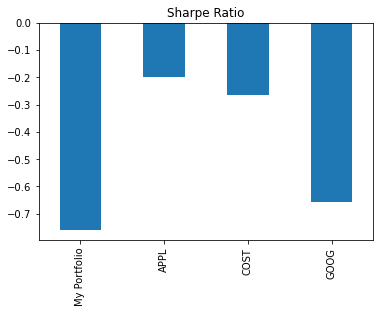

In [349]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios2.plot(kind='bar', title='Sharpe Ratio')



### How does your portfolio do?

Write your answer here!